In [4]:
import json

file_path = '/nas/datahub/llava-v1.5-instruct/llava_v1_5_mix665k.json' 

with open(file_path, 'r', encoding='utf-8') as f:
    samples = json.load(f)

print(type(samples))

print(f'sample 개수: {len(samples)}')

image_exist_count = sum(1 for sample in samples if 'image' in sample)

total_samples = len(samples)
image_none_count = total_samples - image_exist_count

print(f"✅ 'image'가 있는 샘플 개수: {image_exist_count}")
print(f"❌ 'image'가 없는 샘플 개수: {image_none_count}")

<class 'list'>
sample 개수: 665298
✅ 'image'가 있는 샘플 개수: 624610
❌ 'image'가 없는 샘플 개수: 40688


In [7]:
print(624610/665298)
print(40688/665298)

0.9388424435365806
0.0611575564634194


In [5]:
import json

file_path = '/nas/datahub/llava-v1.5-instruct/llava_v1_5_mix665k_50pct.json' 

with open(file_path, 'r', encoding='utf-8') as f:
    samples = json.load(f)

print(type(samples))

print(f'sample 개수: {len(samples)}')

image_exist_count = sum(1 for sample in samples if 'image' in sample)

total_samples = len(samples)
image_none_count = total_samples - image_exist_count

print(f"✅ 'image'가 있는 샘플 개수: {image_exist_count}")
print(f"❌ 'image'가 없는 샘플 개수: {image_none_count}")

<class 'list'>
sample 개수: 332649
✅ 'image'가 있는 샘플 개수: 312174
❌ 'image'가 없는 샘플 개수: 20475


In [6]:
print(312174/332649)
print(20475/332649)

0.938448635047753
0.061551364952246966


In [12]:
(0.9388424435365806-0.938448635047753)*100

0.03938084888276405

In [10]:
dict_image_cnt = {}
idx = 0
for sample in samples:
    #print(sample)
    text = [v for k, v in sample['conversations'][0].items()]
    text = ''.join(text)
    #print(text)
    cnt = text.count("<image>")
    
    if cnt >= 1:
        if cnt in dict_image_cnt.keys():
            dict_image_cnt[cnt] += 1
        else:
            dict_image_cnt[cnt] = 1

    idx += 1
    print()

In [11]:
dict_image_cnt

{1: 312174}

그래프가 'comparison_chart.png'로 저장되었습니다.


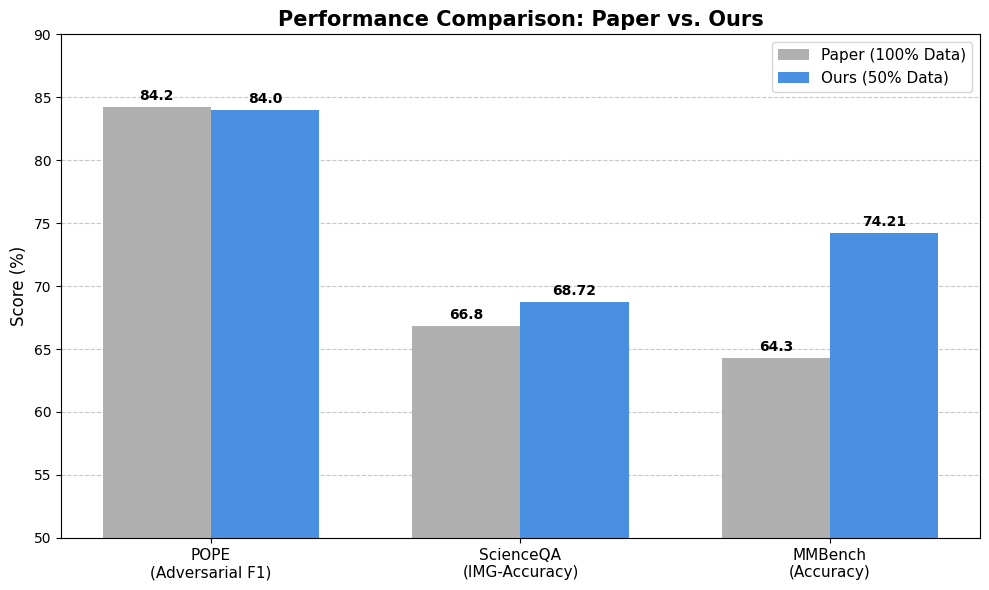

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 설정
benchmarks = ['POPE\n(Adversarial F1)', 'ScienceQA\n(IMG-Accuracy)', 'MMBench\n(Accuracy)']
paper_scores = [84.2, 66.8, 64.3]  # 논문 (100% Data)
ours_scores = [84.0, 68.72, 74.21] # 재현 (50% Data)

# 2. 그래프 설정
x = np.arange(len(benchmarks))  # 라벨 위치
width = 0.35  # 막대 너비

fig, ax = plt.subplots(figsize=(10, 6))

# 3. 막대 그리기 (색상: 논문=회색, 우리꺼=파란색 강조)
rects1 = ax.bar(x - width/2, paper_scores, width, label='Paper (100% Data)', color='#B0B0B0') # 회색
rects2 = ax.bar(x + width/2, ours_scores, width, label='Ours (50% Data)', color='#4A90E2')   # 파란색

# 4. 레이블 및 디자인 설정
ax.set_ylabel('Score (%)', fontsize=12)
ax.set_title('Performance Comparison: Paper vs. Ours', fontsize=15, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(benchmarks, fontsize=11)
ax.set_ylim(50, 90) # Y축 범위 조절 (차이가 잘 보이게)
ax.legend(fontsize=11)

# 배경 눈금선 추가
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# 5. 막대 위에 숫자 표시하는 함수
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

autolabel(rects1)
autolabel(rects2)

# ScienceQA 위에 강조 표시 (화살표 or 텍스트)
# Ours 막대 좌표 계산: 두번째 항목(index 1)의 x + width/2
arrow_x = x[1] + width/2
arrow_y = ours_scores[1]
# 6. 저장 및 출력
plt.tight_layout()
plt.savefig('comparison_chart.png', dpi=300) # 고해상도 저장
print("그래프가 'comparison_chart.png'로 저장되었습니다.")
plt.show()